# How to Use Rakan

How to play with Rakan in Jupyter. Firstly, import it.

In [5]:
import matplotlib.pyplot as plt
from rakan.base import Rakan
from progress.bar import IncrementalBar

Initialize rakan and seed it a `.dnx` file. Available `.dnx` files can be found [here](https://gis.pengra.io).

In [2]:
r = Rakan()
r.read_nx("WA4.dnx")

You can view the state's current redistricting through `.show()`. Additionally, the following stats are available to you as well:

Population Score: 539677274219.6111
Compactness Score: 946.6744229972878
Democrat Seats: 0
Republican Seats: 0
Democrat Proportions: nan%, nan%, nan%, nan%
Republican Proportions: nan%, nan%, nan%, nan%


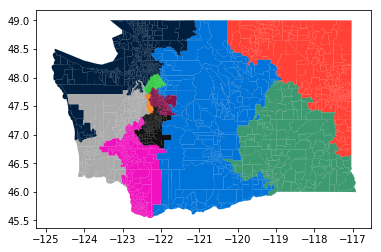

In [3]:
print("Population Score:", r.population_score())
print("Compactness Score:", r.compactness_score())
print("Democrat Seats:", r.democrat_seats())
print("Republican Seats:", r.republican_seats())
print("Democrat Proportions:", ", ".join(["{:.2f}%".format(r.democrat_proportion(i) * 100) for i in range(4)]))
print("Republican Proportions:", ", ".join(["{:.2f}%".format(r.republican_proportion(i) * 100) for i in range(4)]))
r.show()

You are then able to run rakan with any alpha/beta value and view the rejection rates of each run. For instance, here's 100 steps with an alpha value of 1e-10.

Score: 775634835896884.9
Rejection Rate: 2.80%
District populations: [2634729, 1746605, 2300637, 3112037, 2876375, 2595003, 2588295, 1628987, 3411596, 3141051]


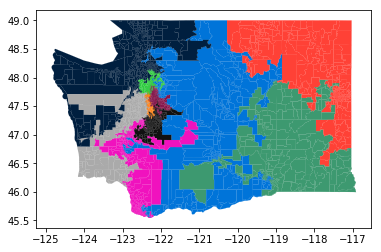

Score: 109182520563841.9
Rejection Rate: 2.70%
District populations: [2562463, 1871626, 2351599, 3074230, 2941739, 2665027, 2525648, 1554993, 3288267, 3199723]


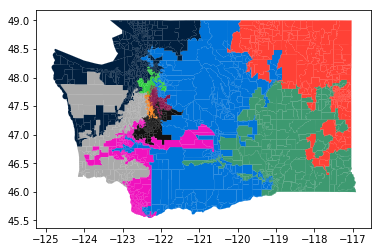

Score: 53487179056186.39
Rejection Rate: 2.67%
District populations: [2556549, 1905798, 2431259, 3085415, 2973405, 2676047, 2500637, 1518996, 3311045, 3076164]


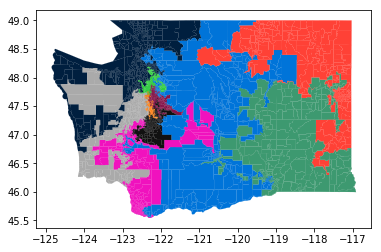

Score: 6006418736164.3545
Rejection Rate: 2.78%
District populations: [2499354, 1978115, 2495370, 3065218, 3086229, 2748616, 2556657, 1475418, 3160625, 2969713]


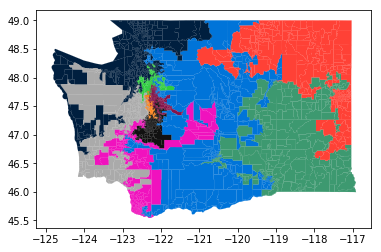

Score: 27515478591711.188
Rejection Rate: 2.78%
District populations: [2393486, 1966975, 2605660, 2978743, 3138392, 2802212, 2466858, 1496557, 3305269, 2881163]


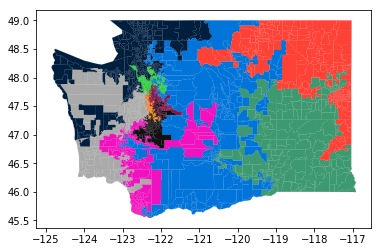

Score: 18852273498232.324
Rejection Rate: 2.62%
District populations: [2454597, 2038572, 2556878, 2947435, 3133937, 2765220, 2486922, 1454657, 3319120, 2877977]


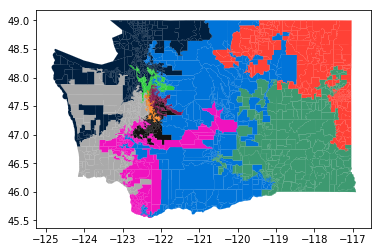

Score: 19400802375154.66
Rejection Rate: 2.47%
District populations: [2432008, 2158110, 2571516, 2884651, 3226342, 2639835, 2433653, 1423926, 3218741, 3046533]


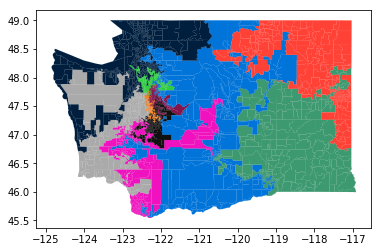

Score: 26407762415290.004
Rejection Rate: 2.61%
District populations: [2493074, 2127068, 2606613, 2849043, 3192726, 2844192, 2308831, 1410564, 3051692, 3151512]


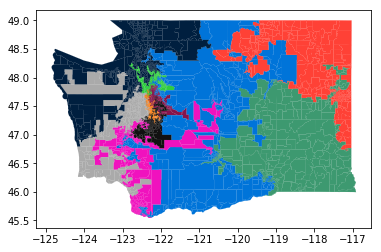

Score: 337139494462105.25
Rejection Rate: 2.57%
District populations: [2514811, 2098235, 2606517, 2865590, 3217054, 2928476, 2262215, 1364760, 3047595, 3130062]


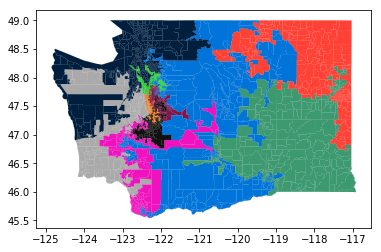

Score: 10108382153384.135
Rejection Rate: 2.61%
District populations: [2560036, 2198112, 2677865, 2866242, 3134875, 2782288, 2267499, 1383858, 3132784, 3031756]


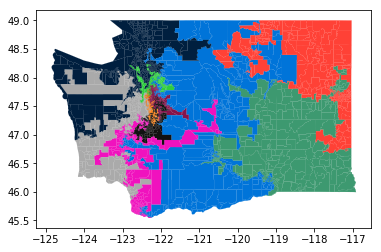

In [20]:
r.ALPHA = 1e-10
r.BETA = 1e-4
moves = []

for round in range(10):
    for _ in range(1000):
        bar.next()
        moved = r.step()
        moves.append(r.step())

    print("Score:", r.score())
    print("Rejection Rate: {:.2f}%".format((1 - (sum(moves) / len(moves))) * 100))
    populations = [_.population for _ in r.districts]
    total_population = sum(populations)
    average_population = total_population / len(populations)
    absolute_population_deltas = [abs(_ - average_population) for _ in populations]
    absolute_population_differences = sum(absolute_population_deltas) / average_population
    print("District populations:", populations)
    print("Distance from ideal:", absolute_population_differences)
    if absolute_population_differences < 0.01:
        print("Map is Constitutional!")
    r.show()
    

Note as the alpha value rises, so does the rejection rate.

Score: 1.1741181605832048e+100
Rejection Rate: 14.50%
District populations: [2601669, 2225604, 2771875, 2782825, 2939327, 2788979, 2433146, 1448032, 2996169, 3047689]
Distance from ideal: 1.3102779820409318


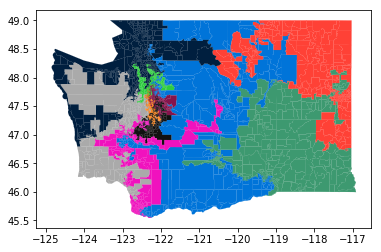

Score: 7.31956443068299e+88
Rejection Rate: 14.30%
District populations: [2635655, 2255498, 2790429, 2704141, 2890886, 2827890, 2503068, 1485934, 3017335, 2924479]
Distance from ideal: 1.2030540056842025


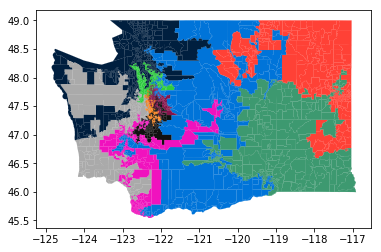

Score: 2.7303959392837535e+84
Rejection Rate: 14.20%
District populations: [2644345, 2266733, 2783272, 2687861, 2904462, 2760223, 2586423, 1496225, 2926100, 2979671]
Distance from ideal: 1.1224857467635787


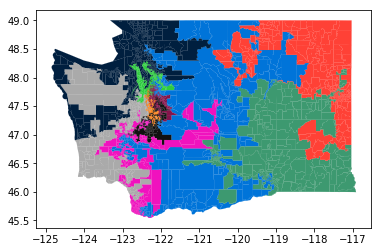

Score: 1.2609049174217783e+78
Rejection Rate: 13.32%
District populations: [2708436, 2307820, 2777148, 2659788, 2906941, 2856528, 2553259, 1519837, 2870764, 2874794]
Distance from ideal: 1.0982609582407588


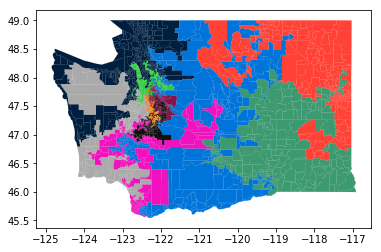

Score: 3.1369266635282156e+79
Rejection Rate: 13.18%
District populations: [2630959, 2322589, 2673267, 2684216, 2928459, 2773254, 2616590, 1517226, 2924273, 2964482]
Distance from ideal: 1.0503026370143784


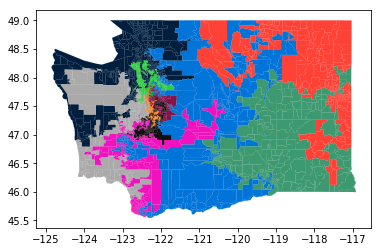

Score: 4.867102987224238e+74
Rejection Rate: 12.78%
District populations: [2664791, 2311905, 2755684, 2700093, 2935071, 2768871, 2589788, 1543335, 2880288, 2885489]
Distance from ideal: 1.0490109299618615


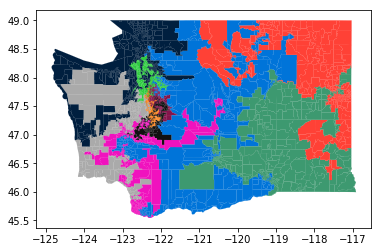

Score: 3.7577892833223503e+74
Rejection Rate: 12.49%
District populations: [2683855, 2214881, 2802035, 2721917, 2919915, 2743113, 2574734, 1585928, 2913295, 2875642]
Distance from ideal: 1.102388428947374


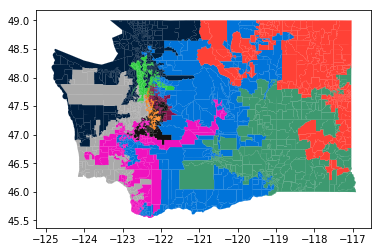

Score: 8.171755453679156e+74
Rejection Rate: 12.22%
District populations: [2624967, 2285025, 2747025, 2670995, 2931468, 2820171, 2615210, 1558667, 2940661, 2841126]
Distance from ideal: 1.0473243746042635


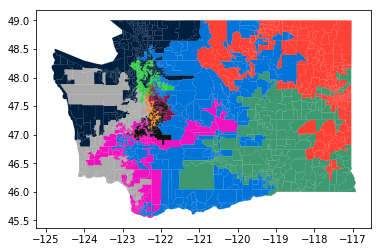

Score: 2.9969727763681537e+71
Rejection Rate: 11.96%
District populations: [2639933, 2337352, 2689953, 2684210, 2947554, 2858949, 2658640, 1556978, 2849740, 2812006]
Distance from ideal: 1.008424902867509


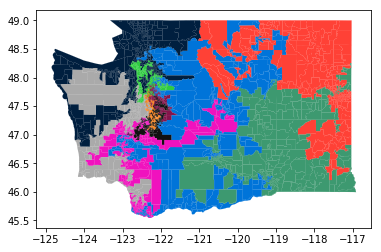

Score: 3.8895870337984725e+67
Rejection Rate: 11.76%
District populations: [2650480, 2331731, 2735733, 2668947, 2854643, 2838971, 2673110, 1580288, 2826701, 2874711]
Distance from ideal: 0.9948364365862291


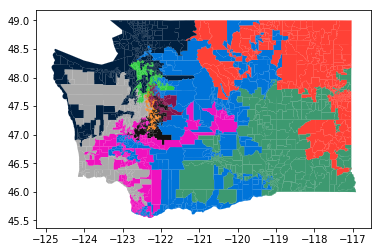

In [22]:
r.ALPHA = 1e-9
r.BETA = 1e-4
moves = []

for round in range(10):
    for _ in range(1000):
        moved = r.step()
        moves.append(r.step())

    print("Score:", r.score())
    print("Rejection Rate: {:.2f}%".format((1 - (sum(moves) / len(moves))) * 100))
    populations = [_.population for _ in r.districts]
    total_population = sum(populations)
    average_population = total_population / len(populations)
    absolute_population_deltas = [abs(_ - average_population) for _ in populations]
    absolute_population_differences = sum(absolute_population_deltas) / average_population
    print("District populations:", populations)
    print("Distance from ideal:", absolute_population_differences)
    if absolute_population_differences < 0.01:
        print("Map is Constitutional!")
    r.show()

In [31]:
print("Compactness Score:", r.compactness_score())
print("Population Score:", r.population_score())

Compactness Score: 10163.690891186769
Population Score: 154615135132.5


Score: inf
Rejection Rate: 27.80%
District populations: [2742768, 2307907, 2786467, 2738860, 2776517, 2737344, 2746771, 1697660, 2753992, 2747029]
Distance from ideal: 0.9229740450614867


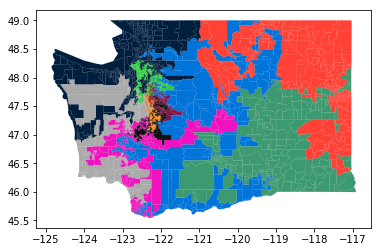

Score: inf
Rejection Rate: 26.50%
District populations: [2722449, 2353367, 2739554, 2753353, 2740472, 2744855, 2733044, 1763403, 2758142, 2726676]
Distance from ideal: 0.8375493056258394


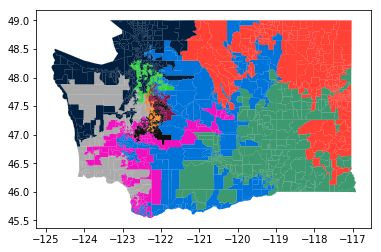

Score: inf
Rejection Rate: 25.83%
District populations: [2739619, 2360723, 2730271, 2738997, 2738454, 2728614, 2691252, 1805212, 2756594, 2745579]
Distance from ideal: 0.799781373876214


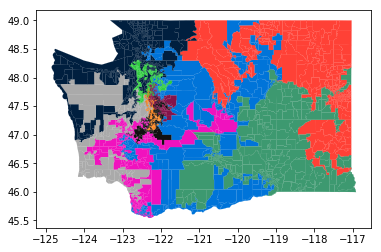

Score: inf
Rejection Rate: 25.00%
District populations: [2743153, 2342738, 2724058, 2727684, 2741222, 2751802, 2731762, 1841420, 2718308, 2713168]
Distance from ideal: 0.7857826955425736


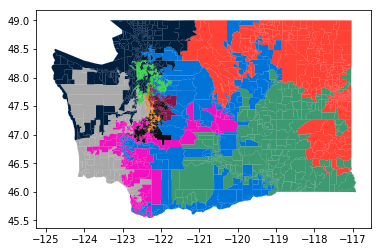

Score: inf
Rejection Rate: 25.12%
District populations: [2741677, 2341160, 2738951, 2724121, 2736560, 2721815, 2705174, 1868614, 2737260, 2719983]
Distance from ideal: 0.766104808027097


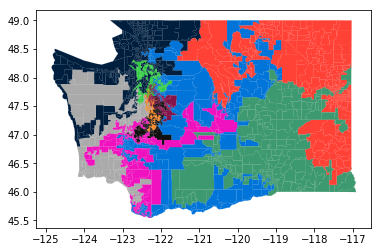

Score: inf
Rejection Rate: 25.03%
District populations: [2683640, 2350994, 2746924, 2697163, 2745907, 2769267, 2701397, 1883223, 2696151, 2760649]
Distance from ideal: 0.7473280042895583


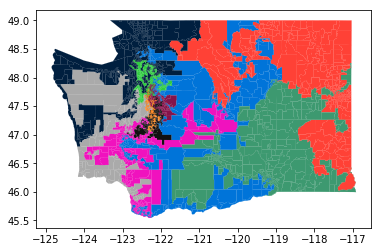

Score: inf
Rejection Rate: 24.90%
District populations: [2706120, 2357431, 2715408, 2725904, 2752031, 2771135, 2666375, 1911240, 2707102, 2722569]
Distance from ideal: 0.7208608768513075


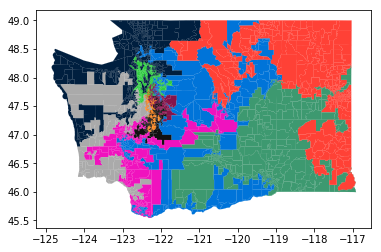

Score: 8.023801488580164e+301
Rejection Rate: 24.81%
District populations: [2716593, 2344763, 2724238, 2685595, 2707562, 2728084, 2711654, 1939985, 2741279, 2735562]
Distance from ideal: 0.7085107286007486


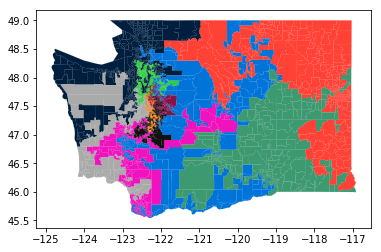

Score: 1.513854242718122e+271
Rejection Rate: 24.93%
District populations: [2710488, 2344758, 2741074, 2668920, 2729259, 2742998, 2673460, 1984858, 2711446, 2728054]
Distance from ideal: 0.6740436979541058


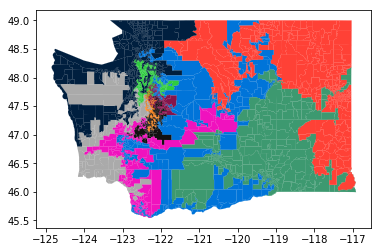

Score: 1.768991637463604e+249
Rejection Rate: 24.74%
District populations: [2708197, 2344159, 2753867, 2685789, 2708797, 2682040, 2727013, 2015638, 2696965, 2712850]
Distance from ideal: 0.6508590351221024


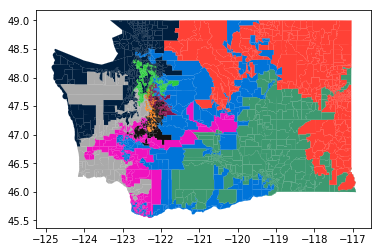

In [32]:
r.ALPHA = 1e-8
r.BETA = 1e-3

for round in range(10):
    moves = []
    for _ in range(1000):
        moved = r.step()
        moves.append(r.step())

    print("Score:", r.score())
    print("Rejection Rate: {:.2f}%".format((1 - (sum(moves) / len(moves))) * 100))
    populations = [_.population for _ in r.districts]
    total_population = sum(populations)
    average_population = total_population / len(populations)
    absolute_population_deltas = [abs(_ - average_population) for _ in populations]
    absolute_population_differences = sum(absolute_population_deltas) / average_population
    print("District populations:", populations)
    print("Distance from ideal:", absolute_population_differences)
    if absolute_population_differences < 0.01:
        print("Map is Constitutional!")
    r.show()

In [39]:
print(r.population_score() * 1e-9)
print(r.compactness_score() * 1e-2)

56.26524790272222
112.61618816194127


Score: 3.171324878722445e+278
Rejection Rate: 24.60%
District populations: [2672422, 2351244, 2733660, 2693469, 2693711, 2715276, 2711542, 2034102, 2719148, 2710741]
Distance from ideal: 0.6312326161600119


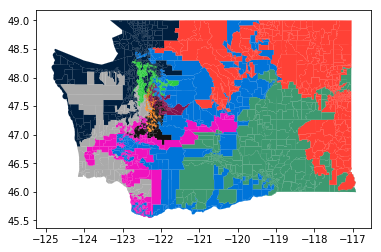

Score: 7.625384949831976e+228
Rejection Rate: 22.00%
District populations: [2705300, 2410225, 2686809, 2690580, 2710891, 2661812, 2658354, 2086284, 2710118, 2714942]
Distance from ideal: 0.5458386042189234


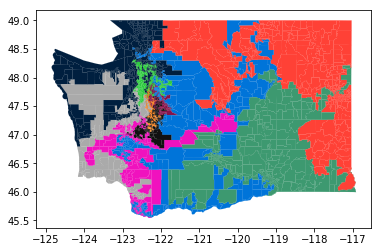

Score: 1.4886030227020007e+219
Rejection Rate: 21.60%
District populations: [2666765, 2400990, 2693532, 2683885, 2708210, 2719979, 2674584, 2109348, 2682688, 2695334]
Distance from ideal: 0.535215341162571


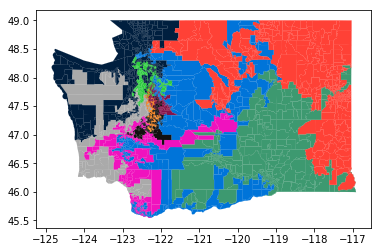

Score: 3.4487547626703483e+196
Rejection Rate: 22.50%
District populations: [2676716, 2387509, 2682418, 2680532, 2687779, 2697387, 2697282, 2156695, 2698076, 2670921]
Distance from ideal: 0.5091999078943351


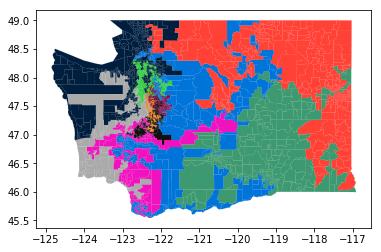

Score: 7.5583160818174645e+177
Rejection Rate: 23.50%
District populations: [2675667, 2402854, 2712488, 2708335, 2663258, 2637663, 2644827, 2194076, 2668823, 2727324]
Distance from ideal: 0.4686964609416095


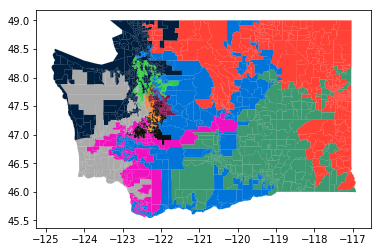

Score: 1.5886318946921376e+159
Rejection Rate: 21.60%
District populations: [2625733, 2404147, 2741216, 2668069, 2683302, 2675506, 2607267, 2243693, 2717907, 2668475]
Distance from ideal: 0.429588042241855


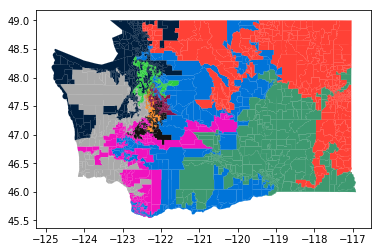

Score: 2.3932675433764976e+144
Rejection Rate: 21.00%
District populations: [2674712, 2379313, 2678322, 2713739, 2682849, 2627917, 2634158, 2285793, 2656029, 2702483]
Distance from ideal: 0.41632451921553476


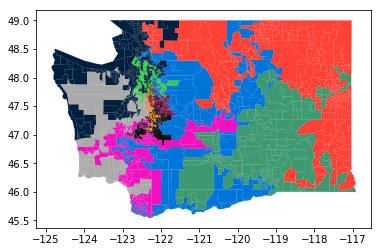

Score: 1.2109096918626683e+125
Rejection Rate: 21.10%
District populations: [2638182, 2401718, 2672119, 2663343, 2668257, 2648725, 2658516, 2317693, 2689818, 2676944]
Distance from ideal: 0.3746081044150993


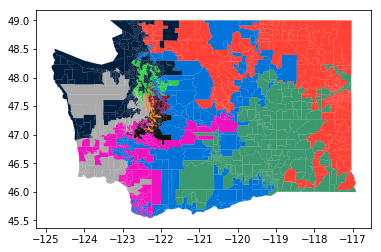

Score: 3.053722381994263e+119
Rejection Rate: 20.10%
District populations: [2650405, 2394096, 2664639, 2659808, 2680075, 2683005, 2614922, 2346146, 2680495, 2661724]
Distance from ideal: 0.35860599343622307


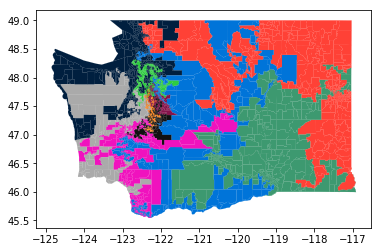

Score: 2.4569953851426926e+100
Rejection Rate: 23.30%
District populations: [2616152, 2411966, 2666140, 2645658, 2675175, 2644996, 2645628, 2409420, 2632040, 2688140]
Distance from ideal: 0.2962721979741747


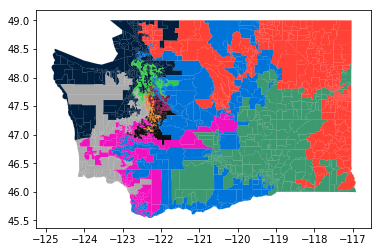

In [40]:
r.ALPHA = 1e-8
r.BETA = 1e-2

for round in range(10):
    moves = []
    for _ in range(1000):
        moved = r.step()
        moves.append(r.step())

    print("Score:", r.score())
    print("Rejection Rate: {:.2f}%".format((1 - (sum(moves) / len(moves))) * 100))
    populations = [_.population for _ in r.districts]
    total_population = sum(populations)
    average_population = total_population / len(populations)
    absolute_population_deltas = [abs(_ - average_population) for _ in populations]
    absolute_population_differences = sum(absolute_population_deltas) / average_population
    print("District populations:", populations)
    print("Distance from ideal:", absolute_population_differences)
    if absolute_population_differences < 0.01:
        print("Map is Constitutional!")
    r.show()

Score: 1.4050974710037542e+92
Rejection Rate: 20.80%
District populations: [2578223, 2421465, 2669321, 2687331, 2638913, 2639088, 2635183, 2442542, 2687928, 2635321]
Distance from ideal: 0.28297295423542984


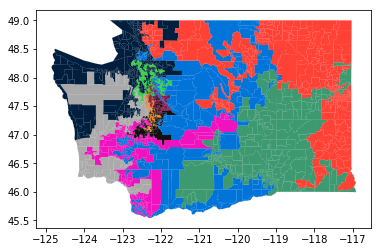

Score: 4.210587870788135e+83
Rejection Rate: 21.90%
District populations: [2596301, 2453881, 2656087, 2658987, 2641622, 2631099, 2638512, 2439526, 2655106, 2664194]
Distance from ideal: 0.24650095456882315


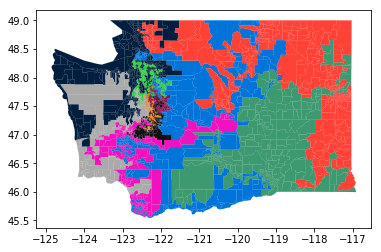

Score: 3.3401958872570843e+74
Rejection Rate: 23.40%
District populations: [2607745, 2466009, 2645186, 2649142, 2642758, 2613954, 2634279, 2475671, 2651313, 2649258]
Distance from ideal: 0.20386386721266864


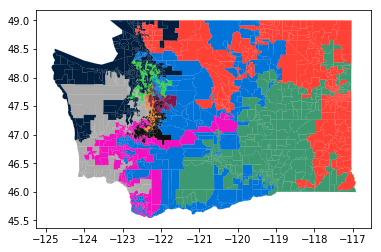

Score: 7.893397176430817e+75
Rejection Rate: 19.90%
District populations: [2587513, 2474462, 2627887, 2659545, 2663103, 2614351, 2605691, 2478133, 2642189, 2682441]
Distance from ideal: 0.20778431142469372


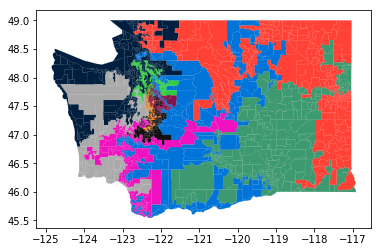

Score: 1.1957013881346282e+72
Rejection Rate: 20.40%
District populations: [2623204, 2488845, 2653073, 2622486, 2637868, 2651156, 2625581, 2469511, 2630871, 2632720]
Distance from ideal: 0.19105357473109122


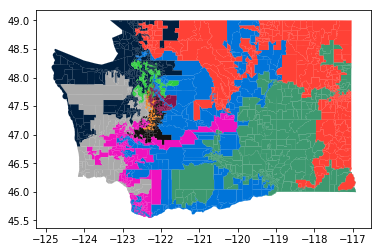

Score: 1.0847276175658778e+75
Rejection Rate: 22.10%
District populations: [2635301, 2489958, 2609636, 2664416, 2649067, 2630212, 2603232, 2464664, 2621250, 2667579]
Distance from ideal: 0.1941520584636675


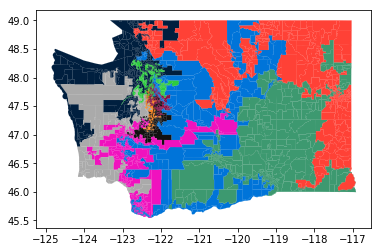

Score: 1.1185890633001785e+68
Rejection Rate: 20.40%
District populations: [2639610, 2492537, 2613803, 2644481, 2625364, 2617901, 2614541, 2506127, 2615578, 2665373]
Distance from ideal: 0.16008947846415533


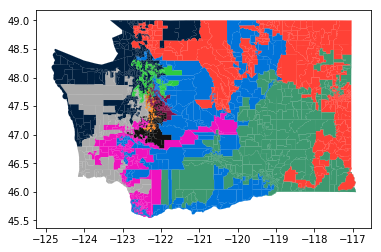

Score: 2.1418591260999277e+64
Rejection Rate: 19.30%
District populations: [2602550, 2530297, 2665849, 2603630, 2641338, 2599453, 2606530, 2507542, 2654561, 2623565]
Distance from ideal: 0.13388276654229073


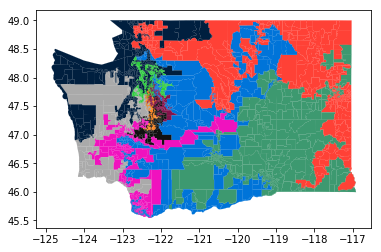

Score: 1.614384229301131e+68
Rejection Rate: 23.00%
District populations: [2577494, 2511314, 2645054, 2632433, 2646315, 2666740, 2567234, 2516641, 2598322, 2673768]
Distance from ideal: 0.18947533379181317


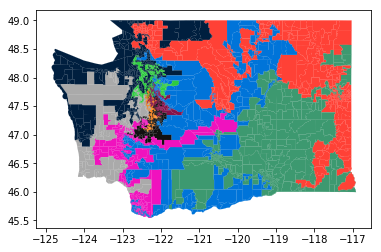

Score: 4.153707587131149e+63
Rejection Rate: 23.10%
District populations: [2619064, 2513495, 2620956, 2619260, 2616269, 2620013, 2652302, 2516984, 2632969, 2624003]
Distance from ideal: 0.13564959747942362


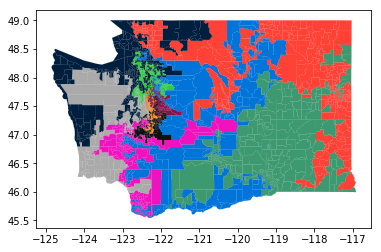

In [41]:
r.ALPHA = 1e-8
r.BETA = 1e-2

for round in range(10):
    moves = []
    for _ in range(1000):
        moved = r.step()
        moves.append(r.step())

    print("Score:", r.score())
    print("Rejection Rate: {:.2f}%".format((1 - (sum(moves) / len(moves))) * 100))
    populations = [_.population for _ in r.districts]
    total_population = sum(populations)
    average_population = total_population / len(populations)
    absolute_population_deltas = [abs(_ - average_population) for _ in populations]
    absolute_population_differences = sum(absolute_population_deltas) / average_population
    print("District populations:", populations)
    print("Distance from ideal:", absolute_population_differences)
    if absolute_population_differences < 0.01:
        print("Map is Constitutional!")
    r.show()

Score: inf
Rejection Rate: 33.30%
District populations: [2593063, 2515823, 2644188, 2630260, 2676102, 2612779, 2606808, 2468377, 2677963, 2609952]
Distance from ideal: 0.17924230991635784


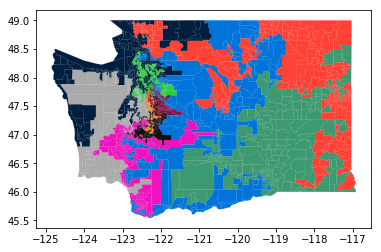

Score: inf
Rejection Rate: 32.60%
District populations: [2603121, 2479393, 2637143, 2698060, 2604400, 2607139, 2614481, 2461262, 2664246, 2666070]
Distance from ideal: 0.20496660017364876


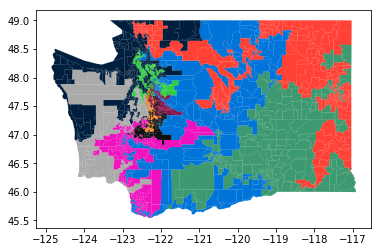

Score: inf
Rejection Rate: 33.30%
District populations: [2617460, 2466836, 2626398, 2662391, 2617575, 2612648, 2591801, 2457020, 2705672, 2677514]
Distance from ideal: 0.2265672606611443


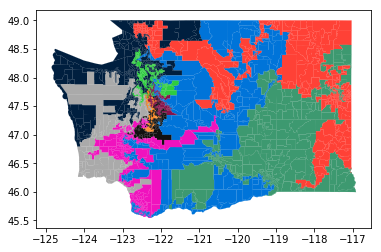

Score: inf
Rejection Rate: 30.10%
District populations: [2580668, 2487681, 2637800, 2657464, 2625530, 2612911, 2633279, 2444529, 2666946, 2688507]
Distance from ideal: 0.22870205334561922


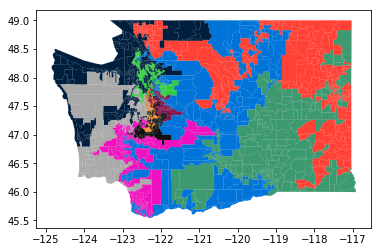

Score: inf
Rejection Rate: 33.70%
District populations: [2608145, 2493821, 2623758, 2618468, 2614967, 2618604, 2646249, 2474899, 2651909, 2684495]
Distance from ideal: 0.18309208089089762


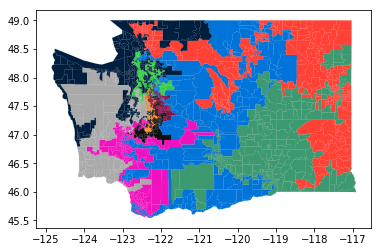

Score: inf
Rejection Rate: 34.70%
District populations: [2594699, 2489947, 2613905, 2657197, 2631449, 2609317, 2648694, 2459641, 2662495, 2667971]
Distance from ideal: 0.20457405643065965


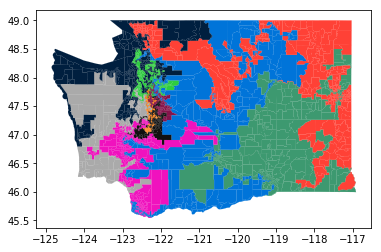

Score: inf
Rejection Rate: 34.40%
District populations: [2641127, 2481263, 2627893, 2621233, 2588086, 2607070, 2664971, 2451920, 2670499, 2681253]
Distance from ideal: 0.22225619317454004


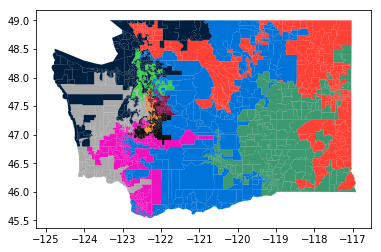

Score: inf
Rejection Rate: 33.20%
District populations: [2623562, 2450662, 2652388, 2625068, 2638339, 2612006, 2663409, 2434247, 2648039, 2687595]
Distance from ideal: 0.24747463205265618


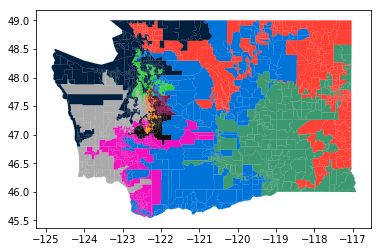

Score: inf
Rejection Rate: 34.00%
District populations: [2627826, 2456332, 2658810, 2636974, 2611675, 2642363, 2599884, 2466042, 2654443, 2680966]
Distance from ideal: 0.2214964558715729


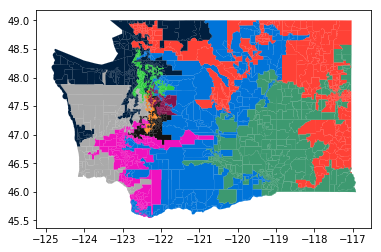

Score: inf
Rejection Rate: 35.30%
District populations: [2607440, 2490533, 2651480, 2686178, 2606221, 2594901, 2648712, 2463523, 2643455, 2642872]
Distance from ideal: 0.20098662144091592


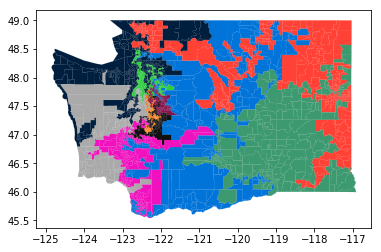

In [42]:
r.ALPHA = 1e-8
r.BETA = 1e-1

for round in range(10):
    moves = []
    for _ in range(1000):
        moved = r.step()
        moves.append(r.step())

    print("Score:", r.score())
    print("Rejection Rate: {:.2f}%".format((1 - (sum(moves) / len(moves))) * 100))
    populations = [_.population for _ in r.districts]
    total_population = sum(populations)
    average_population = total_population / len(populations)
    absolute_population_deltas = [abs(_ - average_population) for _ in populations]
    absolute_population_differences = sum(absolute_population_deltas) / average_population
    print("District populations:", populations)
    print("Distance from ideal:", absolute_population_differences)
    if absolute_population_differences < 0.01:
        print("Map is Constitutional!")
    r.show()

Score: inf
Rejection Rate: 75.70%
District populations: [2604912, 2599343, 2600555, 2605936, 2608243, 2607240, 2602977, 2599588, 2601145, 2605376]
Distance from ideal: 0.010792648370108062


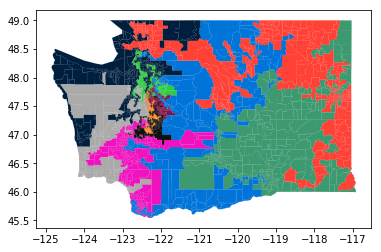

Score: inf
Rejection Rate: 75.20%
District populations: [2607415, 2598869, 2604331, 2602053, 2602716, 2606024, 2602151, 2600340, 2608368, 2603048]
Distance from ideal: 0.009227466616017513
Map is Constitutional!


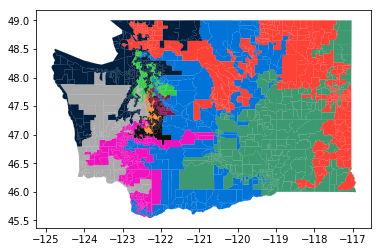

Score: inf
Rejection Rate: 75.30%
District populations: [2606770, 2601498, 2602481, 2602035, 2605627, 2605789, 2602621, 2601335, 2601779, 2605380]
Distance from ideal: 0.007251688715884559
Map is Constitutional!


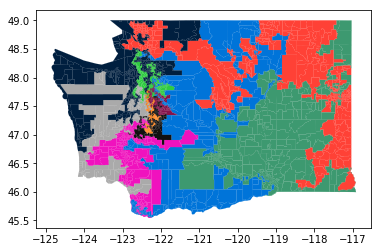

Score: inf
Rejection Rate: 77.40%
District populations: [2603291, 2601909, 2606258, 2601837, 2603165, 2606822, 2603656, 2598729, 2603682, 2605966]
Distance from ideal: 0.006703587031691377
Map is Constitutional!


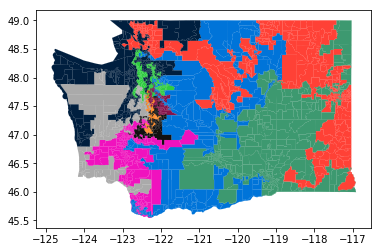

Score: inf
Rejection Rate: 77.20%
District populations: [2603930, 2602346, 2603126, 2600084, 2605180, 2603490, 2602833, 2601246, 2605818, 2607262]
Distance from ideal: 0.006194662903060708
Map is Constitutional!


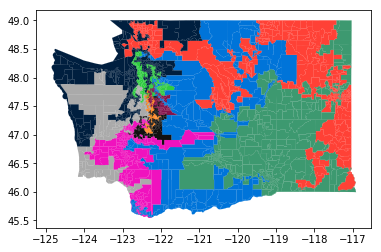

Score: inf
Rejection Rate: 76.20%
District populations: [2604822, 2599750, 2607353, 2604049, 2600018, 2605563, 2604194, 2602282, 2604039, 2603245]
Distance from ideal: 0.006783862611226329
Map is Constitutional!


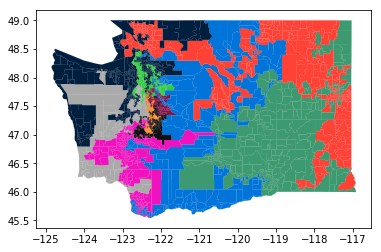

Score: inf
Rejection Rate: 75.40%
District populations: [2604700, 2600292, 2603983, 2604868, 2604291, 2603399, 2602941, 2600459, 2606520, 2603862]
Distance from ideal: 0.005404198105534733
Map is Constitutional!


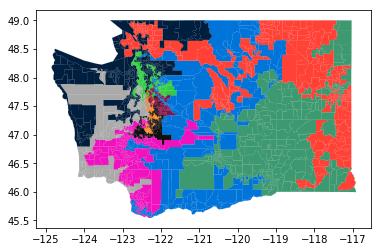

Score: inf
Rejection Rate: 76.50%
District populations: [2604450, 2601451, 2604605, 2603859, 2604377, 2605525, 2604369, 2601158, 2605345, 2600176]
Distance from ideal: 0.005999159218930134
Map is Constitutional!


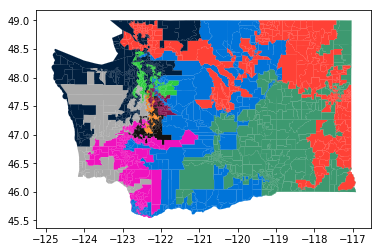

Score: inf
Rejection Rate: 76.40%
District populations: [2601603, 2599482, 2606120, 2602417, 2604796, 2607373, 2601785, 2603751, 2604252, 2603736]
Distance from ideal: 0.006790008110138095
Map is Constitutional!


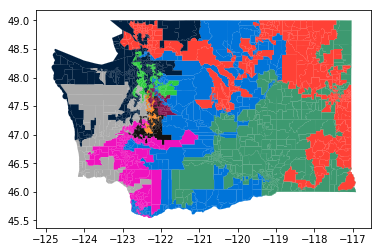

Score: inf
Rejection Rate: 76.50%
District populations: [2603710, 2600718, 2605320, 2601006, 2607665, 2600408, 2603988, 2604232, 2600871, 2607397]
Distance from ideal: 0.008544548049447452
Map is Constitutional!


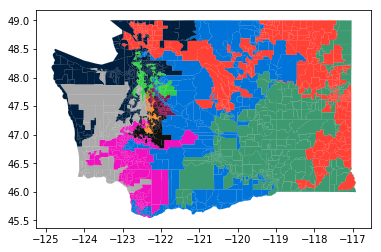

In [44]:
r.ALPHA = 1e-6
r.BETA = 1e-1

for round in range(10):
    moves = []
    for _ in range(1000):
        moved = r.step()
        moves.append(r.step())

    print("Score:", r.score())
    print("Rejection Rate: {:.2f}%".format((1 - (sum(moves) / len(moves))) * 100))
    populations = [_.population for _ in r.districts]
    total_population = sum(populations)
    average_population = total_population / len(populations)
    absolute_population_deltas = [abs(_ - average_population) for _ in populations]
    absolute_population_differences = sum(absolute_population_deltas) / average_population
    print("District populations:", populations)
    print("Distance from ideal:", absolute_population_differences)
    if absolute_population_differences < 0.01:
        print("Map is Constitutional!")
    r.show()

In [ ]:
r.ALPHA = 1e-6
r.BETA = 1e-1

for round in range(10):
    moves = []
    for _ in range(1000):
        moved = r.step()
        moves.append(r.step())

    print("Score:", r.score())
    print("Rejection Rate: {:.2f}%".format((1 - (sum(moves) / len(moves))) * 100))
    populations = [_.population for _ in r.districts]
    total_population = sum(populations)
    average_population = total_population / len(populations)
    absolute_population_deltas = [abs(_ - average_population) for _ in populations]
    absolute_population_differences = sum(absolute_population_deltas) / average_population
    print("District populations:", populations)
    print("Distance from ideal:", absolute_population_differences)
    if absolute_population_differences < 0.01:
        print("Map is Constitutional!")
    r.show()

Note how the statistics have changed.

In [7]:
print("Population Score:", r.population_score())
print("Compactness Score:", r.compactness_score())
print("Democrat Seats:", r.democrat_seats())
print("Republican Seats:", r.republican_seats())
print("Democrat Proportions:", ", ".join(["{:.2f}%".format(r.democrat_proportion(i) * 100) for i in range(4)]))
print("Republican Proportions:", ", ".join(["{:.2f}%".format(r.republican_proportion(i) * 100) for i in range(4)]))

Population Score: 1578076603.6666667
Compactness Score: 663.2432081807082
Democrat Seats: 2
Republican Seats: 2
Democrat Proportions: 43.75%, 39.54%, 55.85%, 54.97%
Republican Proportions: 55.02%, 59.40%, 42.83%, 43.61%
